# Data Cleaning

Data cleaning for data analytics refers to the process of identifying and correcting or removing incorrect, corrupted, improperly formatted, duplicate, or incomplete data within a dataset. This crucial step ensures that the data is accurate, consistent, and reliable for analysis or other purposes.

### `Data Cleaning Steps for Data Analytics`

- Handling Missing Data  `(Drop or Fill)`
- Standardizing Data Formats `(Correct Data Format)`
- Filtering Unwanted Outliers `(Drop Out of Range)`
- Handling Duplicates" `(Drop Duplicates)`


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data Set

In [2]:
# Reading the CSV file into a DataFrame, setting the first column as the index
df = pd.read_csv("/kaggle/input/old-car-data-set/car_price.csv", index_col=0)

# Setting pandas option to display a maximum of 20 columns in the DataFrame
pd.set_option('display.max_columns', 20)

# Displaying the first row of the DataFrame
df.head(1)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,NaN,1956 cc,5 Seats


In [3]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5505 non-null   object 
 2   kms_driven           5507 non-null   object 
 3   fuel_type            5509 non-null   object 
 4   transmission         5508 non-null   object 
 5   ownership            5499 non-null   object 
 6   manufacture          5511 non-null   float64
 7   engine               5506 non-null   object 
 8   Seats                5501 non-null   object 
dtypes: float64(1), object(8)
memory usage: 430.6+ KB


In [4]:
# Displaying the shape of the DataFrame
df.shape

(5512, 9)

# Checking and Droping Null Values

In [5]:
# Calculating the percentage of missing values in each column
percent_missing_per_column = (df.isnull().sum() / df.shape[0]) * 100

In [6]:
# Displaying the percentage of missing values in each column
percent_missing_per_column

car_name               0.000000
car_prices_in_rupee    0.126996
kms_driven             0.090711
fuel_type              0.054427
transmission           0.072569
ownership              0.235849
manufacture            0.018142
engine                 0.108853
Seats                  0.199565
dtype: float64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check the DataFrame after dropping rows
print(df.isna().sum())


car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64


# Data Cleaning of Columns

## `Extract the company_name from car_name Column`

In [8]:
# Define a function to extract the company name from the car name
def company_name(x):
    return x[:x.index(" ")]

# Applying the 'company_name' function to create a new column 'company_name'
df['company_name'] = df['car_name'].apply(company_name)

## `Excluding the company name`

In [9]:
# Define a function to extract the car name (excluding the company name)
def car_name(x):
    return x[x.index(" ") + 1:]

# Applying the 'car_name' function to update the 'car_name' column
df['car_name'] = df['car_name'].apply(car_name)

## `car_prices_in_rupee`

In [10]:
# Remove commas from the 'car_prices_in_rupee' column
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(",", "")

In [11]:
# Define a function to convert normalized prices to INR
def normalized_to_inr(x):
    p = x.split(" ")
    try:
        if p[1] == 'Lakh':
            return str(round(float(p[0]) * 100000, 1))
        elif p[1] == 'Crore':
            return str(round(float(p[0]) * 10000000, 1))
    except:
        return x

In [12]:
# Apply the function to the 'car_prices_in_rupee' column
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(normalized_to_inr)

# Convert the 'car_prices_in_rupee' column to float64
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('float64')

## `kms_driven`

In [13]:
# Remove commas from the 'kms_driven' column
df['kms_driven'] = df['kms_driven'].str.replace(",", "")

# Remove "kms" from the 'kms_driven' column
df['kms_driven'] = df['kms_driven'].str.replace(" kms", "")

# Convert the 'kms_driven' column to int64
df['kms_driven'] = df['kms_driven'].astype("int64")


##  `engine`

In [14]:
# Remove " cc" from the 'engine' column
df['engine'] = df['engine'].str.replace(" cc", "")

# Convert the 'engine' column to int64
df['engine'] = df['engine'].astype('int64')

## `Seats`

In [15]:
# Remove " Seats" from the 'Seats' column
df['Seats'] = df['Seats'].str.replace(" Seats", "")

# Convert the 'Seats' column to int64
df['Seats'] = df['Seats'].astype('int64')

### `Additional Steps: Adding Random Dates in manufacture_date column in DataFrame`

In [16]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define start and end dates
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 12, 31)

# Calculate the number of days between start and end dates
delta = end_date - start_date

# Generate random dates within the specified range
random_dates = [start_date + timedelta(days=random.randint(0, delta.days)) for _ in range(5470)]  # Change 10 to the desired number of dates

# Create an empty DataFrame
date_df = pd.DataFrame()

# Assign the 'manufacture_date' column to the DataFrame
date_df['manufacture_date'] = pd.DataFrame(random_dates, columns=['manufacture_date'])


# Merge the original DataFrame with the DataFrame containing the manufacture_date column
df = pd.concat([df, date_df], axis=1)

# Display the updated DataFrame
df.head(1)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,manufacture_date
1,Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1st Owner,2021.0,1330.0,5.0,Renault,2021-09-16


In [17]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check the DataFrame after dropping rows
print(df.isna().sum())


car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
company_name           0
manufacture_date       0
dtype: int64


In [18]:
df['manufacture_date'] = pd.to_datetime(df['manufacture_date'])

# Data Cleaning for Machine Learning:

- `Handling Missing Data`
- `Outlier Detection & Handling`
- `Data Scaling & Transformation`
- `Encoding Categorical Variables`
- `Handling Duplicates`
- `ealing with Imbalanced Data"`

`!pip install scikit-learn`


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

## `car_name`

In [20]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform car_name
encoded_car_name = label_encoder.fit_transform(df['car_name'])

df['car_name'] = encoded_car_name

## `fuel_type`

In [21]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform fuel_type
encoded_fuel_type = label_encoder.fit_transform(df['fuel_type'])

# Replace the original 'fuel_type' column with the encoded values
df['fuel_type'] = encoded_fuel_type

## `transmission`

In [22]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform transmission
encoded_transmission = label_encoder.fit_transform(df['transmission'])

# Replace the original 'transmission' column with the encoded values
df['transmission'] = encoded_transmission

## `ownership`

In [23]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform ownership
encoded_ownership = label_encoder.fit_transform(df['ownership'])

# Replace the original 'ownership' column with the encoded values
df['ownership'] = encoded_ownership

## `company_name`

In [24]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform company_name
encoded_company_name = label_encoder.fit_transform(df['company_name'])

# Replace the original 'company_name' column with the encoded values
df['company_name'] = encoded_company_name

## `manufacture_year`

In [25]:
# Extracting the year from the 'manufacture_date' column and storing it in a new column 'manufacture_year'
df['manufacture_year'] = df['manufacture_date'].dt.year

# Dropping the 'manufacture_date' column
df = df.drop(columns=['manufacture_date', 'manufacture'])

# Checking Outlier in Dataset

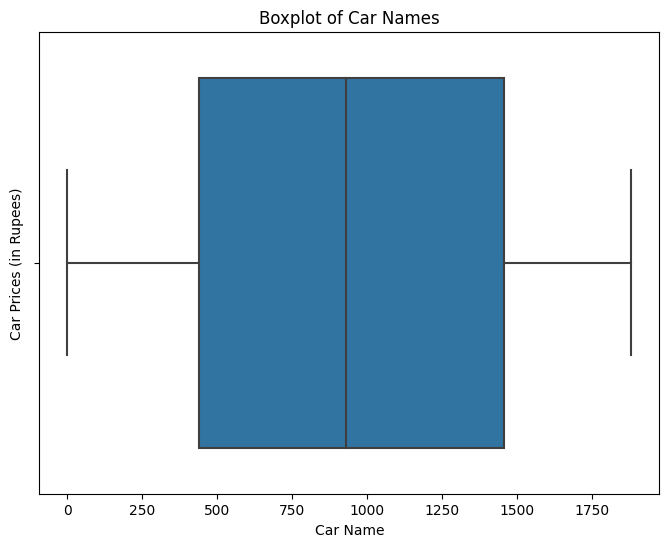

In [26]:
# Car_name Column
plt.figure(figsize=(8, 6))
sns.boxplot(x="car_name", data=df)
plt.title("Boxplot of Car Names")
plt.xlabel("Car Name")
plt.ylabel("Car Prices (in Rupees)")
plt.show()

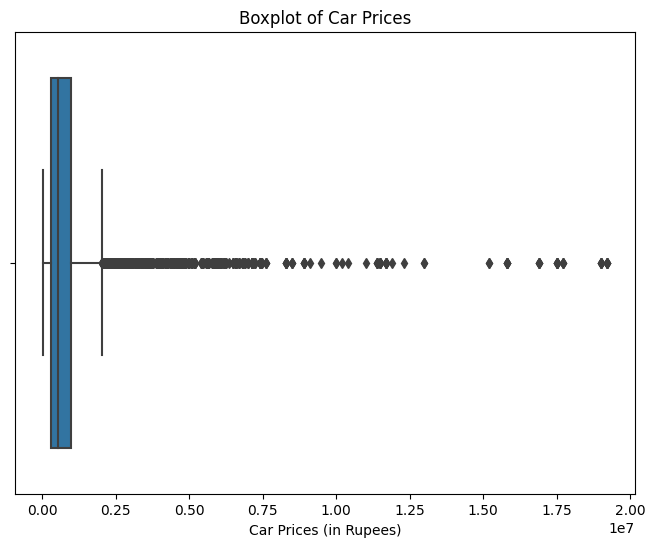

In [27]:
# car_prices_in_rupee Column
plt.figure(figsize=(8, 6))
sns.boxplot(x="car_prices_in_rupee", data=df)
plt.title("Boxplot of Car Prices")
plt.xlabel("Car Prices (in Rupees)")
plt.show()


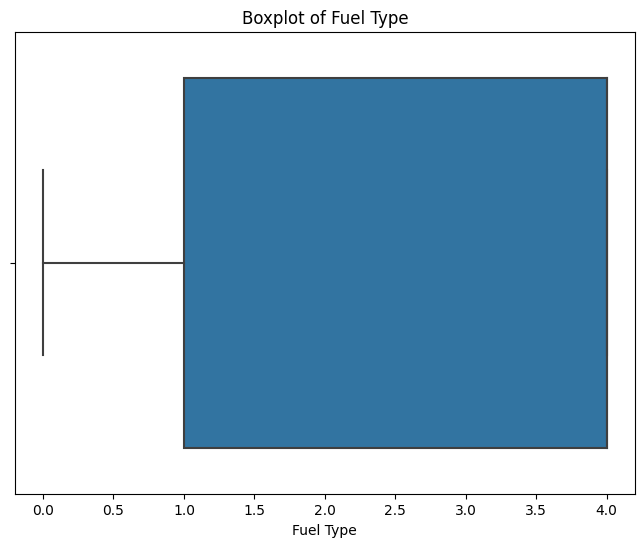

In [28]:
# fuel_type Column
plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", data=df)
plt.title("Boxplot of Fuel Type")
plt.xlabel("Fuel Type")
plt.show()


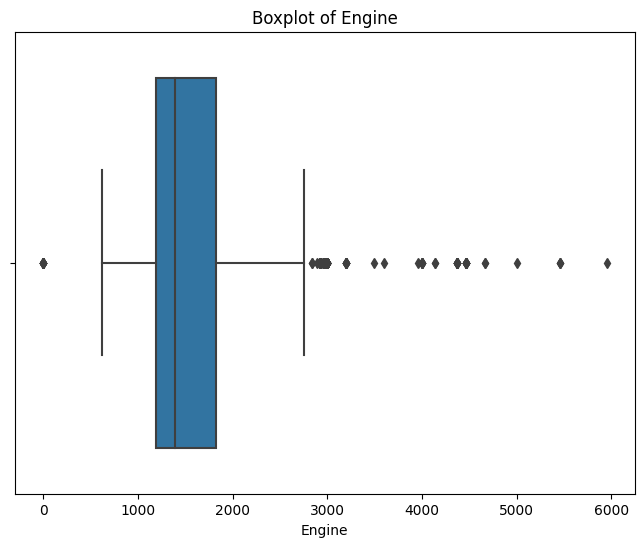

In [29]:
# engine Column
plt.figure(figsize=(8, 6))
sns.boxplot(x="engine", data=df)
plt.title("Boxplot of Engine")
plt.xlabel("Engine")
plt.show()


# Removing Outlier

In [30]:
# Calculate the first quartile (Q1)
q1 = np.quantile(df['engine'], 0.25)

# Calculate the third quartile (Q3)
q3 = np.quantile(df['engine'], 0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1


In [31]:
# Calculate the lower bound of the range
min_range = q1 - (1.5 * iqr)

# Calculate the upper bound of the range
max_range = q3 + (1.5 * iqr)

# Filter the DataFrame to remove outliers
df = df[df['engine'] <= max_range]


# Scalling

In [32]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform data
scaled_data = scaler.fit_transform(df[['kms_driven', 'engine', 'Seats']])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df[['kms_driven', 'engine', 'Seats']].columns)

scaled_df.head()

,kms_driven,engine,Seats
0,-1.195998,-0.270230,-0.341055
1,-0.876395,-0.573848,-0.341055
2,-0.329235,-0.578484,-0.341055
3,-0.101225,-0.578484,-0.341055
4,0.525219,-0.117262,-0.341055
